*  The dataset contains 6366 observations of 9 variables:
* rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)
* age: woman's age
* yrs_married: number of years married
* children: number of children
* religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)
* educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school, 20= advanced degree)
* occupation: woman's occupation (1 = student, 2 = farming/semiskilled/
* unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
* occupation_husb: husband's occupation (same coding as above)
* affairs: time spent in extra-marital affairs

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
data = sm.datasets.fair.load_pandas().data

In [136]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [137]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1].astype(int)

In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [148]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg1 = logreg.predict(X_test)

D:\Gautam\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
confusion_mtx = confusion_matrix(y_test, y_pred_logreg1)

In [150]:
def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

In [151]:
total_error_rate(confusion_matrix)

0.16896984924623115

In [152]:
correct_rate = 1 - total_error_rate(confusion_matrix)

In [153]:
correct_rate

0.8310301507537688

In [154]:
metrics.accuracy_score(y_test,y_pred_logreg1)


0.8310301507537688

## Feature Selection

### 1.univariate selection

In [155]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply select k best algorithm
ordered_rank_features = SelectKBest(score_func=chi2,k=2)
ordered_features = ordered_rank_features.fit(X,y)

ordered_features.scores_

array([  90.10907802,  309.26043222, 1212.98972263,  225.22276764,
         46.98528014,    7.87083363,    7.63477989,   11.13745846])

In [156]:
feature_rank = pd.DataFrame(ordered_features.scores_,X.columns)
feature_rank.columns = ['Score']
feature_rank

,Score
rate_marriage,90.109078
age,309.260432
yrs_married,1212.989723
children,225.222768
religious,46.985280
educ,7.870834
occupation,7.634780
occupation_husb,11.137458


TOP 5 features

In [158]:
feature_rank.nlargest(5,'Score')

,Score
yrs_married,1212.989723
age,309.260432
children,225.222768
rate_marriage,90.109078
religious,46.985280


### 2.Feature Importance

This technique gives scores to each feature and higher the score more relevant/important it is

In [161]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.12552718 0.08834932 0.11016298 0.11561907 0.07998556 0.15010886
 0.14696432 0.18328271]


In [162]:
rank_features = pd.Series(model.feature_importances_,index = X.columns)
rank_features

rate_marriage      0.125527
age                0.088349
yrs_married        0.110163
children           0.115619
religious          0.079986
educ               0.150109
occupation         0.146964
occupation_husb    0.183283
dtype: float64

<AxesSubplot:>

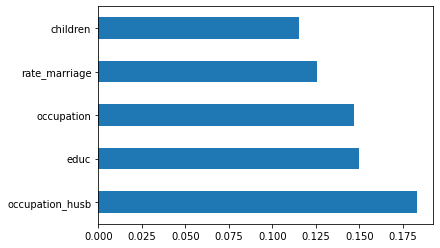

In [163]:
rank_features.nlargest(5).plot(kind='barh')

### 3.pierson-correlation

In [164]:
import seaborn as sns
corr = data.corr()
corr

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [165]:
top_features = corr.index
top_features

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

<AxesSubplot:>

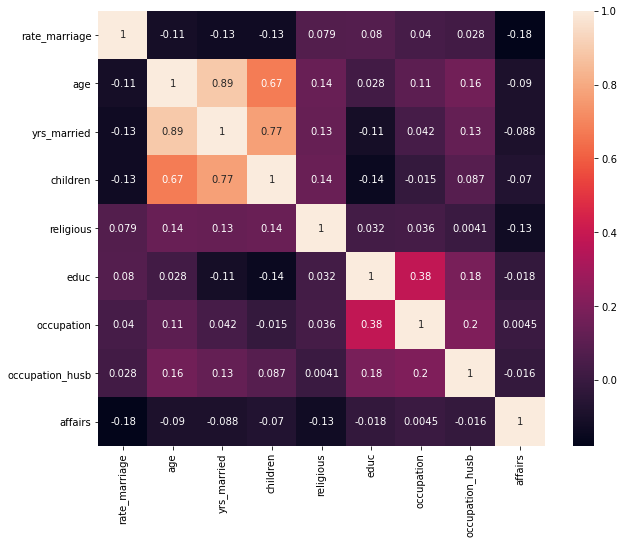

In [166]:
plt.figure(figsize=(10,8))
sns.heatmap(data[top_features].corr(),annot=True)

##### Remove the independent features which are  highly correlated to each other 

so we take corr heatmap of idependent feature

<AxesSubplot:>

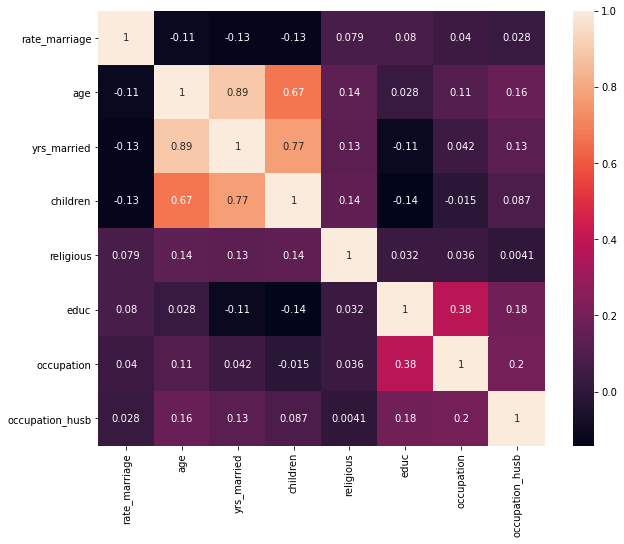

In [167]:
corr = data.iloc[:,:-1].corr() # including all features except last
top_features = corr.index
top_features
plt.figure(figsize=(10,8))
sns.heatmap(data[top_features].corr(),annot=True)

In [168]:
# find and remove the correlated features
def correlation(dataset,threshold):
    col_corr = set()  # set of all names of correlated features/columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs( corr_matrix.iloc[i ,j] ) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]    # getting the name of columns
                col_corr.add(colname)
    return col_corr

In [170]:
threshold=0.8

In [171]:
correlation(data.iloc[:,:-1],threshold)

{'yrs_married'}

In [172]:
data.drop('yrs_married',axis = 1,inplace=True)
data.drop('children',axis = 1,inplace=True)

<AxesSubplot:>

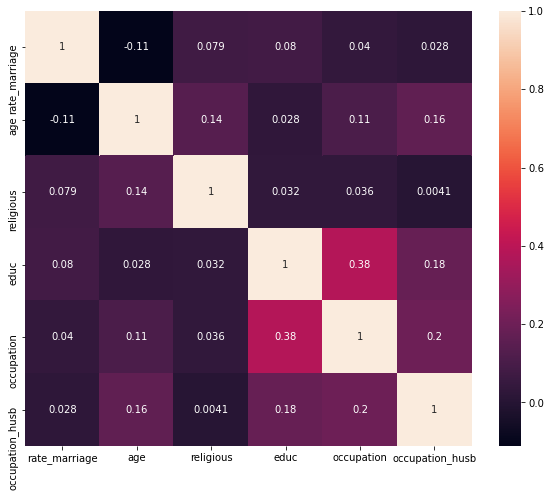

In [173]:
corr = data.iloc[:,:-1].corr() # including all features except last
top_features = corr.index
top_features
plt.figure(figsize=(10,8))
sns.heatmap(data[top_features].corr(),annot=True)

see now no correlation among the features

## So from feature selection methods we have removed yrs_married

In [179]:
X1 = data.iloc[:,:-1]
y

0       0
1       3
2       1
3       0
4       4
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affairs, Length: 6366, dtype: int32

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size = 0.25,random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg2 = logreg.predict(X_test)

D:\Gautam\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [186]:
confusion_mtx = confusion_matrix(y_test, y_pred_logreg2)
total_error_rate(confusion_matrix)

0.16896984924623115

In [187]:
correct_rate = 1- total_error_rate(confusion_matrix)
correct_rate

0.8310301507537688

In [189]:
metrics.accuracy_score(y_test,y_pred_logreg2)

0.8310301507537688

### usng cross validation 

In [193]:
X_train.head()

,rate_marriage,age,religious,educ,occupation,occupation_husb
4533,5.0,22.0,3.0,16.0,5.0,5.0
2720,3.0,27.0,2.0,12.0,3.0,2.0
3407,5.0,22.0,3.0,12.0,5.0,4.0
3326,5.0,22.0,2.0,16.0,2.0,1.0
5306,5.0,22.0,4.0,16.0,2.0,4.0


In [194]:
cross_val_score(logreg, X, y, cv=10, scoring ='accuracy').mean()

D:\Gautam\anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\Gautam\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Gautam\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
   

0.82422247563757

so our model is showing 82 percent accuracy using logistic regresson algorithm